In [37]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.getcwd()) + '/OpenTraj/opentraj/') # Anaconda python can't find the toolkit path without this for some reason
import numpy as np
import matplotlib.pyplot as plt

## Reading some longer example trajectories from different datasets for the purpose of running robot planner simulations

### Edinburgh

In [ ]:
from toolkit.loaders.loader_edinburgh import load_edinburgh
opentraj_root = './OpenTraj/'
selected_day = '01Sep' # 3 days of data in total, ['01Jul', '01Aug', '01Sep']
edinburgh_path = os.path.join(opentraj_root, 'datasets/Edinburgh/annotations', 'tracks.%s.txt' % selected_day)
traj_dataset = load_edinburgh(edinburgh_path, title="Edinburgh", 
                              use_kalman=False, scene_id=selected_day, sampling_rate=9)
data = traj_dataset.data

### ETH

In [1]:
### ETH seq

In [188]:
from toolkit.loaders.loader_eth import load_eth
traj_dataset = load_eth("OpenTraj/datasets/ETH/seq_eth/obsmat.txt", sampling_rate=4)
data = traj_dataset.data

In [189]:
data = data[data['label']=='pedestrian']

21


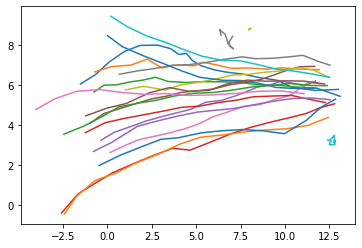

In [193]:
all_x = []
all_y = []


for agent_id in np.unique(data['agent_id']):

    sample_x = data["pos_x"].loc[data["agent_id"]==agent_id].values
    sample_y = data["pos_y"].loc[data["agent_id"]==agent_id].values
    
    if len(sample_x) > 12:
        all_x.append(list(sample_x))
        all_y.append(list(sample_y))
    
print(len(all_x))

for i in range(len(all_x)):
    plt.plot(all_x[i], all_y[i])
plt.show()

In [185]:
mdic = {"x": all_x[:20], "y": all_y[:20]}
from scipy.io import savemat
savemat("trajectories_ETH.mat", mdic)

In [2]:
### seq_hotel

In [162]:
from toolkit.loaders.loader_eth import load_eth
traj_dataset = load_eth("OpenTraj/datasets/ETH/seq_hotel/obsmat.txt", sampling_rate=4)
data = traj_dataset.data

In [163]:
all_x = []
all_y = []


for agent_id in np.unique(data['agent_id']):

    sample_x = data["pos_x"].loc[data["agent_id"]==agent_id].values
    sample_y = data["pos_y"].loc[data["agent_id"]==agent_id].values
    
    if len(sample_x) > 1:
        all_x.append(list(sample_x))
        all_y.append(list(sample_y))
    
print(len(all_x))

0


### UCY

In [219]:
import os
from toolkit.loaders.loader_crowds import load_crowds
# fixme: replace OPENTRAJ_ROOT with the address to root folder of OpenTraj
OPENTRAJ_ROOT = './OpenTraj/'
zara01_annot = os.path.join(OPENTRAJ_ROOT, 'datasets/UCY/zara01/annotation.vsp')
zara01_H_file = os.path.join(OPENTRAJ_ROOT, 'datasets/UCY/zara01/H.txt')
traj_dataset = load_crowds(zara01_annot, use_kalman=False, homog_file=zara01_H_file)

In [220]:
data = traj_dataset.data

all_x = []
all_y = []


for agent_id in np.unique(data['agent_id']):

    sample_x = data["pos_x"].loc[data["agent_id"]==agent_id].values
    sample_y = data["pos_y"].loc[data["agent_id"]==agent_id].values
    
    if len(sample_x) > 50:
        all_x.append(list(sample_x))
        all_y.append(list(sample_y))
    
print(len(all_x))

14


In [221]:
all_x = []
all_y = []


for agent_id in np.unique(traj_dataset.data['agent_id'])[:100]:

    sample_x = data["pos_x"].loc[data["agent_id"]==agent_id].values
    sample_y = data["pos_y"].loc[data["agent_id"]==agent_id].values
    
    if len(sample_x) > 40:
        all_x.append(list(sample_x))
        all_y.append(list(sample_y))
    
print(len(all_x))

18


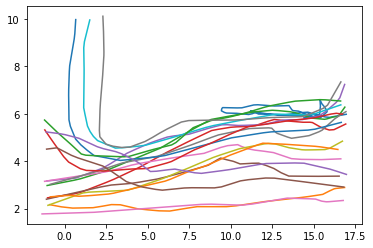

In [222]:
for i in range(len(all_x)):
    plt.plot(all_x[i], all_y[i])
plt.show()

In [223]:
mdic = {"x": all_x[:20], "y": all_y[:20]}
from scipy.io import savemat
savemat("trajectories_UCY.mat", mdic)

### HERMES

In [224]:
import os
from toolkit.loaders.loader_hermes import load_bottleneck
serie = 'Corridor-2D'
exp = 'bo-360-160-160'
OPENTRAJ_ROOT = './OpenTraj/'
annot_file = os.path.join(OPENTRAJ_ROOT, "datasets/HERMES", serie, exp + '.txt')
traj_dataset = load_bottleneck(annot_file, sampling_rate=6, use_kalman=False, title='Hermes')

In [225]:
data = traj_dataset.data

In [226]:
all_x = []
all_y = []


for agent_id in np.unique(data['agent_id']):

    sample_x = data["pos_x"].loc[data["agent_id"]==agent_id].values
    sample_y = data["pos_y"].loc[data["agent_id"]==agent_id].values
    
    if len(sample_x) > 60:
        all_x.append(list(sample_x))
        all_y.append(list(sample_y))
    
print(len(all_x))

53


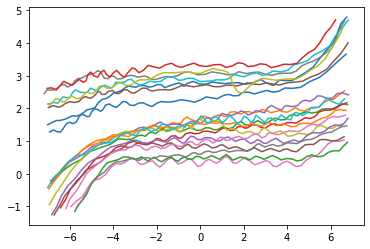

In [227]:
for i in range(len(all_x[:20])):
    plt.plot(all_x[i], all_y[i])
plt.show()

In [228]:
mdic = {"x": all_x[:20], "y": all_y[:20]}
from scipy.io import savemat
savemat("trajectories_HERMES.mat", mdic)

In [229]:
print(mdic)

{'x': [[-7.02098, -6.80745, -6.62765, -6.43759, -6.20716, -6.03291, -5.86597, -5.7271600000000005, -5.53153, -5.35485, -5.21692, -5.03707, -4.84394, -4.68453, -4.5127999999999995, -4.29749, -4.11291, -3.9795999999999996, -3.8022500000000004, -3.6261900000000002, -3.45108, -3.28883, -3.1496, -2.9733199999999997, -2.75523, -2.54819, -2.36506, -2.19552, -1.9904, -1.80889, -1.61925, -1.3375700000000001, -0.989735, -0.7686409999999999, -0.77026, -0.556056, -0.299892, -0.0382185, 0.27201000000000003, 0.567817, 0.857539, 1.14941, 1.45756, 1.7739599999999998, 2.09977, 2.4517599999999997, 2.79316, 3.0677800000000004, 3.36315, 3.65073, 3.9262400000000004, 4.22195, 4.49534, 4.83803, 5.19949, 5.49757, 5.8003, 6.11538, 6.29239, 6.47813, 6.74353], [6.640700000000001, 6.35965, 6.124020000000001, 5.88816, 5.67212, 5.477670000000001, 5.273429999999999, 5.02956, 4.79111, 4.58427, 4.37971, 4.19067, 4.01719, 3.8549, 3.6542700000000004, 3.4672, 3.26164, 3.03198, 2.8282299999999996, 2.62935, 2.43525, 2.2412

In [106]:
from scipy.io import loadmat

In [107]:
a = loadmat("trajectories_HERMES.mat")